In [1]:
pip install tensorflow keras matplotlib numpy


  Using cached MarkupSafe-2.1.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.6/479.6 MB 437.4 kB/s eta 0:00:00m eta 0:00:010:00:40
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 192.4 kB/s eta 0:00:001m180.5 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 323.6 kB/s eta 0:00:001m317.6 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 299.6 kB/s eta 0:00:001m291.5 kB/s eta 0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 685.4 kB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 1.2 MB/s eta 0:00:001.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 189.5 kB/s eta 0:00:00 kB/s eta 0:00:02:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 680.5 kB/s eta 0:00:00m eta 0:00:010:011
Using cached MarkupSafe-2.1.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26 kB)
 

In [72]:
import  numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets  import mnist
from tensorflow.keras.models import Sequential #Model,katmanları sıralı şekilde eklememizi sağlar.
from tensorflow.keras.layers import Dense,Flatten#Dense,tam bağlı katman ekler. Flatten, Çok boyutlu(28*28) piksel tek boyuta çevirir.
from tensorflow.keras.utils import to_categorical #one-hot-encoding formatına dönüştürür.


In [73]:
#Veri seti yükleme
(x_train,y_train),(x_test ,y_test) = mnist.load_data()  #Mnist veri setine özel yazılış. Çünkü mnist zaten eğitim ve test oalrak ayrıdır.

print("Eğitim veri boyutu :" ,x_train.shape)
print("Test veri boyutu: :" ,x_test.shape)

Eğitim veri boyutu : (60000, 28, 28)
Test veri boyutu: : (10000, 28, 28)


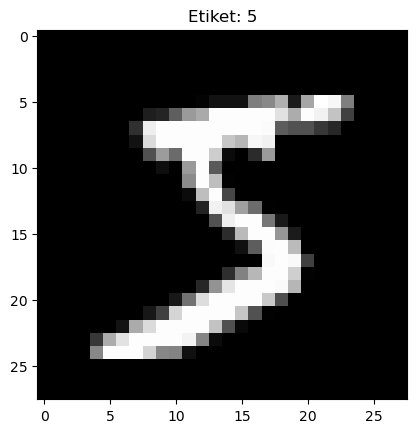

In [74]:
plt.imshow(x_train[0],cmap='gray')       #Görüntü gri tonda gösterilir.
plt.title(f"Etiket: {y_train[0]}")      #Gerçek etiket başlık olarak yazılır.
plt.show()

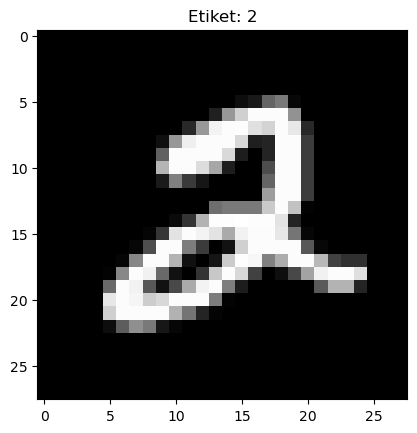

In [75]:
plt.imshow(x_train[5],cmap='gray')
plt.title(f"Etiket: {y_train[5]}")
plt.show()

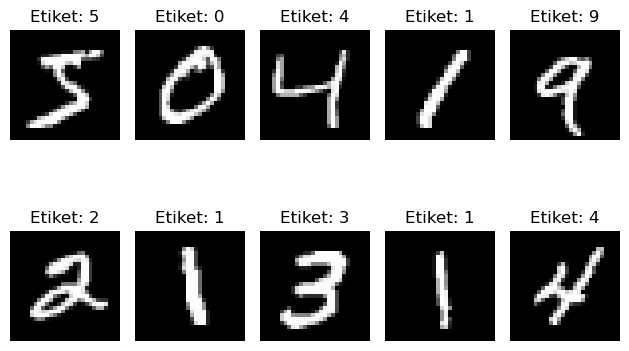

In [76]:
for i in range(10):  # İlk 10 örneği döngüyle alınır.
    plt.subplot(2, 5, i + 1)         # 2 satır 5 sütunluk bir grid
    plt.imshow(x_train[i], cmap='gray')  
    plt.title(f"Etiket: {y_train[i]}")  
    plt.axis('off')                      #Eksenler gösterilmez.

plt.tight_layout()
plt.show()

In [77]:
#Veri önişleme 
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

In [78]:
#One-hot-encoding işlemi
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)


In [79]:
#Model Oluşturma
model=Sequential() # Katmanları sırayla üst üsse eklemek için.
model.add(Flatten(input_shape = (28,28))) #Resim tek boyutlu hale getirilir.
model.add(Dense(128,activation='relu')) # Gizli katmanımım. Her nöron önceki katmandaki tüm nöronlara bağlı olmalı.ReLU aktivasyon fonksiyonu kullanılır böylelikle negatif değerler sıfırlanır.
model.add(Dense(10, activation ='softmax')) #Her  nöron değeri 0 - 1 arasında olasılık yapar ve toplamları 1 olur.

In [80]:
#Modeli eğitme

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

             

In [81]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
1688/1688 [==============================] - 12s 6ms/step - loss: 0.2693 - accuracy: 0.9223 - val_loss: 0.1255 - val_accuracy: 0.9658
Epoch 2/5
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1199 - accuracy: 0.9642 - val_loss: 0.0922 - val_accuracy: 0.9738
Epoch 3/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0817 - accuracy: 0.9752 - val_loss: 0.0815 - val_accuracy: 0.9765
Epoch 4/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0612 - accuracy: 0.9814 - val_loss: 0.0833 - val_accuracy: 0.9748
Epoch 5/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0473 - accuracy: 0.9857 - val_loss: 0.0777 - val_accuracy: 0.9785


In [82]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (60000, 28, 28)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28)
y_test shape: (10000, 10)


In [84]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print(f"Test Doğruluk Oranı : {test_acc:1,.4f}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0742 - accuracy: 0.9778
Test Doğruluk Oranı : 0.9778


313/313 [==============================] - 1s 4ms/step
Tahmin edilen etiket değeri: 1


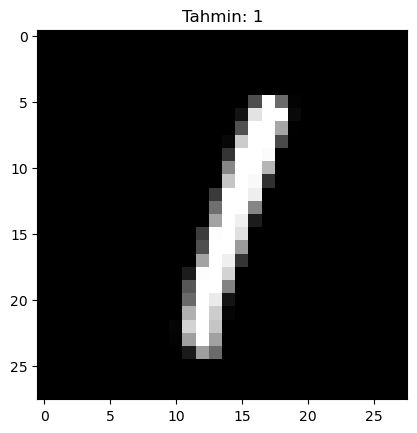

In [91]:
predictions = model.predict(x_test)

index = 5
print("Tahmin edilen etiket değeri:", np.argmax(predictions[index]))
plt.imshow(x_test[index], cmap='gray')
plt.title(f"Tahmin: {np.argmax(predictions[index])}")
plt.show()
